# **Book Recommendation System Using Bayesian Machine Learning**
**University of Chicago MS in Applied Data Science**

**Course:** Bayesian Machine Learning with Generative AI Applications

**Date:** 03/13/2025

**Contributors:**
- Sam Fisher  
- Daniel Sa  
- Jazil Karim  
- Amy (Hyunji) Kim  

## **1 Introduction**  [ Jazil ]

Traditional recommendation systems often rely on the most common items or collaborative filtering techniques, which group users and items based on similarily measures. While these methods can be effective, they struggle in scenarios where data is sparse or user preferences evolve over time, leading to suboptimal recommendations.

Bayesian collaborative filtering enhances recommendation quality by incorporating probability-based predictions. Rather than solely relying on similarity-based heuristics, this approach estimates the likelihood of a user enjoying an item based on observed ratings and latent factors. A key component of this model is the likelihood function, which captures the probability distribution of observed ratings based on user-item interactions. By leveraging Bayesian principles, the model introduces latent variables to capture hidden factors influencing user preferences and dynamically updates its predictions as new data becomes available, offering a more robust and flexible recommendation framework.

---

## **2 Project Summary**

### 2.1 Bayesian Recommendation System for Book Ratings

In this project, we develop a **Bayesian Recommendation System** to predict how users will rate books they have not yet seen. Unlike traditional matrix factorization techniques such as **Singular Value Decomposition (SVD)**, our approach leverages a **Bayesian Network (Bayes Net)** to incorporate user biases, item biases, and latent factors while also quantifying uncertainty in predictions.  

### 2.2 Model Overview  

Our model represents each user with a **latent preference vector (αᵤ)** and each book with a **latent attribute vector (βᵢ)**. Both are drawn from prior distributions that help  regularize the model and prevent overfitting. The predicted rating follows a **probabilistic distribution** which incorporates:  

- A **global rating mean**: Captures overall rating tendencies
- A **user bias term**: Reflects individual rating tendencies (How lenient or harsh a user typically rates books)
- A **book bias term**: Represents the general quality of a book across all users
- The **dot product of preference and attribute vectors**: Represents user-item interactions

### 2.3 Inference & Estimation  

To estimate model parameters, we employ **Markov Chain Monte Carlo (MCMC)** for robust posterior estimation. Additionally, we implement **Automatic Differentiation Variational Inference (ADVI)** as our final inference method to enhance computational efficiency and ensure adaptability to different datasets and user behaviors. All Bayesian parameters are learned directly from the data.  

### 2.4 Dataset [ Daniel ]

The project utilizes the **Book Recommendation Dataset** sourced from Kaggle, which contains real-world book ratings and user interactions: [Dataset Link](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

**Origin & Content**

This dataset is derived from the **Book-Crossing dataset**, originally compiled by Cai-Nicolas Ziegler in 2004. Book-Crossing was an online community where users freely shared their book ratings and reviews.

The dataset provides a rich source of information for building a recommendation system including:

- User Information: Anonymized data about users, such as age and location.
- Book Metadata: Details about books, including titles, authors, publication years, and publishers.
- User Ratings: Explicit ratings given by users on a scale from 0 to 10. A rating of 0 indicates an implicit interaction (e.g., the user might have shown interest in the book without explicitly rating it).

With over **500,000 ratings from more than 100,000 users**, this dataset offers a substantial and diverse collection of user preferences and book characteristics. This allows for robust training of a recommendation model.

**Processed Dataset**

The project uses a structured version of the dataset, which includes the following fields:

- User-ID: A unique identifier for each user.
- ISBN: The International Standard Book Number, a unique commercial book identifier.
- Book-Rating: The rating given by the user to the book.

Here's a glimpse of the processed data:

| User-ID | ISBN       | Book-Rating |
|---------|------------|-------------|
| 276725  | 034545104X | 0           |
| 276726  | 0155061224 | 5           |
| 276727  | 0446605239 | 0           |
| 276729  | 052165615X | 3           |
| 276729  | 0521795028 | 6           |

This processed data will be pivotal in training our Bayesian model to accurately predict user preferences and provide personalized book recommendations.

### 2.5 Model Evaluation  [ AMY ]

We evaluate the model’s performance using the following key metrics:  

**Precision:**

$$
Precision = \frac{\text{Correctly classified actual positives}}{\text{Everything classified as positives}}
$$

- Measures the proportion of correctly recommended items among all items classified as relevant

**Recall:**

$$
Recall = \frac{\text{Correctly classified actual positives}}{\text{All actual positives}}
$$

- Assesses how well the model captures all relevant items by measuring the proportion of actual positives that were successfully recommended.

**Root Mean Squared Error (RMSE):**

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

- Quantifies the accuracy of rating predictions by calculating the average deviation from actual ratings, with larger errors weighted more heavily.

Among these metrics, **precision** is particularly important in a recommendation system, as ensuring that positive predictions are accurate enhances user satisfaction and trust.

Overall, our Bayesian approach not only **enhances recommendation accuracy** but also provides a probabilistic framework that accounts for **uncertainty**. This allows the system to adapt dynamically to new data, improving personalization and trustworthiness in recommendations while mitigating the risks of incorrect predictions.

### 2.6 Advantages of Bayesian Collaborative Filtering  [ SAM ]

Bayesian collaborative filtering offers several advantages over traditional filtering approaches:

1. **Handling Uncertainty**  
   Bayesian methods excel at managing uncertainty by incorporating prior knowledge. They dynamically update predictions as new data becomes available, making them particularly useful in environments where user preferences change frequently.

2. **Addressing the Cold Start Problem**  
   Bayesian models can better handle the cold start problem by utilizing prior distributions based on historical data or demographic information. This allows the system to make educated and improved recommendations for new users and items.

3. **Integration of Prior Knowledge**  
   These methods allow for the incorporation of domain-specific prior knowledge, making them especially useful when data is limited. This leads to more informed and accurate recommendations.

4. **Flexibility and Adaptability**  
   Bayesian models are adaptable to various data types and recommendation scenarios. They can seamlessly integrate multiple data sources, including user behavior, item attributes, and contextual factors, leading to more relevant recommendation.

5. **Probabilistic Framework**  
   By providing a probabilistic framework, Bayesian methods quantify uncertainty in recommendations, leading to more interpretable and reliable suggestions.

6. **Scalability**  
   Bayesian models can scale effectively with large datasets, making them more suitable for real-world applications compared to traditional collaborative filtering methods, particularly when dealing with large datasets.

7. **Enhanced Personalization**  
   By capturing user-specific latent factors, Bayesian approaches offer highly tailored recommendations that adapt to individual preferences.

By leveraging Bayesian collaborative filtering, recommendation systems can achieve greater adaptability, reliability, and personalization, ultimately improving user experience across various applications.

---

## **3 Theory: Collaborative Filtering Model**  [ Daniel ]

This section describes a collaborative filtering model designed to predict user ratings for books. The model leverages past user-book interactions to suggest books to users.

### 3.1 Equation for Predicting Ratings

The predicted rating $r_{u,i}$ (the rating user $u$ gives to item $i$) is modeled as a gamma poisson:

$$
r_{u, i} \sim \mathcal{GammaPoisson}\left(\mu+b_{u}+b_{i}+\alpha_{u}^{T} \beta_{i}, \sigma^{2}\right)
$$

Where the mean of the distribution is the sum of the following components:

*   $\mu$: The global average rating across all users and books. This represents the overall popularity or quality of books in general.

*   $b_{u}$: The user bias. This term captures the tendency of a user to give consistently higher or lower ratings than average.

*   $b_{i}$: The item (book) bias. This term captures the tendency of a book to receive consistently higher or lower ratings than average.

*   $\alpha_{u}^{T} \beta_{i}$: The dot product of the user preference vector $\alpha_{u}$ and the book feature vector $\beta_{i}$. This term captures the interaction between specific user preferences and specific book characteristics.  $\alpha_u$ represents the latent (hidden) preferences of user $u$, while $\beta_i$ represents the latent features of book $i$. The dot product captures how well the user's preferences align with the book's features.

The variance of this normal distribution is $\sigma^{2}$, representing the overall noise or variability in the ratings.

### 3.2 Priors on Model Parameters  

To regularize the model and prevent overfitting, prior distributions are placed on the model parameters:

*   **Global Rating Prior:**

    *   $\mu \sim \mathcal{N}(0,5)$
    *   The global rating $\mu$ follows a normal distribution with a mean of 0 and a variance of 5.
    * This prior allows the model to learn an appropriate global rating, while regularizing it towards zero.

*   **User Biases:**

    *   $b_{u} \sim \mathcal{N}(0,1)$ for all users
    *   Each user bias $b_{u}$ follows a normal distribution with a mean of 0 and a variance of 1.
    * This prior encourages user biases to be small, preventing individual users from unduly influencing the overall rating predictions.

*   **Book Biases:**

    *   $b_{i} \sim \mathcal{N}(0,1)$ for all books
    *   Each book bias $b_{i}$ follows a normal distribution with a mean of 0 and a variance of 1.
    * This prior encourages book biases to be small, preventing individual books from unduly influencing the overall rating predictions. Some books might get consistently good or bad ratings, and this allows the model to capture that.

*   **Latent Book Features:**

    *   $\beta_{i} \sim \mathcal{N}(0, I \sigma_{\beta}^{2})$
    *   Each book feature vector $\beta_{i}$ follows a normal distribution centered at zero with identity covariance matrix scaled by $\sigma_{\beta}^{2}$.

*   **Latent User Preferences:**
    *   $\alpha_{u} \sim \mathcal{N}(0, I \sigma_{\alpha}^{2})$
    *   Each user preference vector $\alpha_{u}$ follows a normal distribution centered at zero with identity covariance matrix scaled by $\sigma_{\alpha}^{2}$.

### 3.3 Summary
This model predicts user ratings by combining a global average rating with user-specific and book-specific biases, as well as a term that captures the interaction between user preferences and book features. Prior distributions are used to regularize the model parameters for better generalization and improved recommendation accuracy by preventing overfitting.

---
## **4 Bayesian Recommendation Modeling**  [ JAZIL ]

###  4.1 Data Preparation for Probabilistic Modeling

The dataset consists of user-book interactions, represented by ratings. We extract key components:  

- **Number of unique users**: `num_users`  
- **Number of unique books**: `num_books`  
- **User IDs**: `user_ids`  
- **Book IDs**: `book_ids`  
- **Ratings given by users**: `ratings`  

A hyperparameter, **latent dimension (latent_dim)**, is set to **2** to control the complexity of latent user and book factors.  

To adjust priors based on sparsity:  

- **User rating counts**: Number of books each user has rated  
- **Book rating counts**: Number of ratings each book has received  


### 4.2 Bayesian Model Initialization

The rating prediction is based on:  

- **Global mean rating (`mu`)**: Modeled with a Gamma prior (α=2, β=0.5)  
- **User bias (`user_bias`)**: Normally distributed with mean **0** and variance **1 / sqrt(user_rating_count)**  
- **Book bias (`book_bias`)**: Modeled similarly to user bias but for books  

**Hierarchical Priors for Latent Factors:**

Bayesian models use **hierarchical priors** to capture uncertainty at multiple levels.  

- **Standard deviation priors**:  
  - `sigma_u` (user factors) ~ Half-Cauchy(β=1)  
  - `sigma_b` (book factors) ~ Half-Cauchy(β=1)  

- **Latent factor distributions**:  
  - `user_factors` ~ Normal(0, `sigma_u`) → Shape: (num_users, latent_dim)  
  - `book_factors` ~ Normal(0, `sigma_b`) → Shape: (num_books, latent_dim)  

These factors represent underlying user preferences and book attributes.  


### 4.3 Rating Prediction

The predicted rating (`lambda_rating`) is computed as:
the combination of user biases, book biases, and latent factors.
$$
\lambda_{rating} = \exp(\mu + user\_bias[user] + book\_bias[book] + (user\_factors[user] \cdot book\_factors[book]))
$$

where:

- `mu` is the global average rating.
- `user_bias` and `book_bias` capture user-specific and book-specific biases in rating tendencies.
- `user_factors[user] ⋅ book_factors[book]` represents the interaction between user and book latent factors. This captures how much a user's preferences align with a book's characteristics.


### 4.4 Likelihood Function (Poisson Distribution)

Observed ratings (`ratings_obs`) follow a **Poisson likelihood**:

$$
ratings\_obs \sim \text{Poisson}(\lambda_{\text{rating}})
$$

This allows the model to learn parameters (user/book biases and latent factors) that best explain observed ratings.


### 4.5 Bayesian Inference & Model Training

The model parameters are estimated using **Bayesian inference**, which updates prior beliefs based on observed data to compute **posterior distributions**. We use:  

- **Markov Chain Monte Carlo (MCMC)** for robust posterior estimation  
- **Automatic Differentiation Variational Inference (ADVI)** as an alternative for faster convergence  


### 4.6 Model Updates & Learning

During training, the model iteratively updates:  

1. **Error Calculation**  
   - Example: `error = observed_rating - predicted_rating`  

2. **Parameter Updates**  
   - `user_bias[user] += learning_rate * error`  
   - `book_bias[book] += learning_rate * error`  
   - `user_factors[user] += learning_rate * error * book_factors[book]`  
   - `book_factors[book] += learning_rate * error * user_factors[user]`  

This process minimizes the difference between predicted and actual ratings.  

---


## **5 Multi-Step Lookahead & Bayesian Regret Minimization Strategy** [ SAM ]

Our recommendation system employs a **Bayesian regret minimization strategy** that uses **multi-step lookahead** to optimize the selection of recommended books. This method balances the trade-off between **exploitation** (recommending books we are confident the user will enjoy) and **exploration** (suggesting books where the system is less certain but could learn valuable information).

For each user, we compute:

- **Expected reward**: The mean predicted rating for each book, based on posterior samples from our Bayesian model.
- **Uncertainty (variance)**: The variability in those predictions, which represents how uncertain the system is about the user’s potential rating of a book.
- **Regret**: The difference between the best possible expected reward and the expected reward for each book.

By combining these components, the system assigns an **exploration score** to each book:

$$
\text{Exploration Score} = \text{Expected Reward} + (\text{Exploration Factor} \times \text{Uncertainty})
$$

Books with **higher uncertainty** and **potential learning benefit** are prioritized when their **regret** exceeds a defined threshold. This lookahead mechanism ensures that some recommendations actively reduce uncertainty about user preferences, improving the model's long-term learning.

Ultimately, the **multi-step lookahead approach** selects a top-`k` list of books that balances immediate relevance with future learning potential, driving both short-term user satisfaction and long-term system improvement.

---

## **6 Results and Evaluaton**  [ AMY ]

We assess our model's performance by evaluating the **predicted ratings** it generates. Due to computational constraints, the Bayesian model was trained using a subset of **1,000 samples** from the dataset, with **800 samples for training** and **200 samples for testing**. The evaluation was conducted on this subset to analyze the model’s effectiveness in making accurate predictions.

**Precision**

We define a threshold of **7** to classify the numerically predicted ratings as positive or negative and convert the ratings into a binary classification problem.

Precision measures the proportion of correctly predicted positive ratings among all predicted positive ratings.

  - **Training set (800 samples):** 60%
  - **Test set (200 samples):** 21%

**Recall**

Recall evaluates the proportion of actual positive ratings that were correctly identified by the model.

  - **Training set (800 samples):** 61%
  - **Test set (200 samples):** 20%

**Root Mean Squared Error (RMSE)**

RMSE quantifies the difference between predicted and actual ratings, with lower values indicating better prediction accuracy.

  - **Training set (800 samples):** 1.44
  - **Test set (200 samples):** 2.58

Our evaluation indicates that our Bayesian recommendation model performs well on the training data, though its precision and recall drop on the test set. The discrepancy suggests that the model may be overfitting to the training data, limiting the model’s ability to generalize effectively to new data.

Due to computational constraints, we trained our model on a subset of the dataset rather than the full dataset. We expect improved model performance when trained with the entire dataset.

Additionally, we aim to introduce more evlauation metrics to better assess the relevance of the top-k recommendations generated by our model.

## **7 Takeaways**

Our key takeaways include:

- Accurate priors are everything in Bayesian Machine Learning - well-defined priors significantly impact Bayesian model performance.
- Hyperparameter tuning should be the final step - optimizing other components first yields better results.
- Sampling can be more computationally expensive than you might think.
- Model prediction time is nothing to sneeze at! Computational efficiency should never be underestimated.

 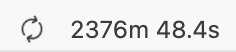


## **8 Conclusions & Future Improvements**  [ Daniel ]
- Introduce variables of book and author metadata to improve predictions.
- Introduce variables of user metadata to improve predictions.
- Evaluate the recommendations our model provides to improve fine-tuning. Possible metrics that can be considered: Diversity, Coverage, NDCG, and MRR
- Utilize superior hardware to train better models (more latent dimensions, more data)